# Bike Sharing Demands Trends

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
fileName = "day.csv"


In [4]:
pd.to_datetime("2011-01-01", format="%Y-%m-%d")

Timestamp('2011-01-01 00:00:00')

In [416]:
df = pd.read_csv(fileName, index_col="instant")

df.dteday = pd.to_datetime(df.dteday, format="%Y-%m-%d")

df["casual_perc"] = df.casual/ (df.casual + df.registered)
df["registered_perc"] = df.registered/ (df.casual + df.registered)
df["casual_to_registered"] = df.casual/ df.registered

features = df.drop(["cnt", "dteday", "weekday", "atemp"], axis=1)
features.casual = features.casual / features.casual.max()
features.registered = features.registered / features.registered.max()
target = df.cnt / df.cnt.max()

In [417]:
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                              
1       2011-01-01       1   0     1        0        6           0   
2       2011-01-02       1   0     1        0        0           0   
3       2011-01-03       1   0     1        0        1           1   
4       2011-01-04       1   0     1        0        2           1   
5       2011-01-05       1   0     1        0        3           1   

         weathersit      temp     atemp       hum  windspeed  casual  \
instant                                                                
1                 2  0.344167  0.363625  0.805833   0.160446     331   
2                 2  0.363478  0.353739  0.696087   0.248539     131   
3                 1  0.196364  0.189405  0.437273   0.248309     120   
4                 1  0.200000  0.212122  0.590435   0.160296     108   
5                 1  0.226957  0.229270  0.436957   0.186900      82   

         registered   cnt  casual_perc  registered_perc  casual_to_registered  
instant                                                                        
1               654   985     0.336041         0.663959              0.506116  
2               670   801     0.163546         0.836454              0.195522  
3              1229  1349     0.088955         0.911045              0.097640  
4              1454  1562     0.069142         0.930858              0.074278  
5              1518  1600     0.051250         0.948750              0.054018

In [418]:
features.head()

season  yr  mnth  holiday  workingday  weathersit      temp  \
instant                                                                
1             1   0     1        0           0           2  0.344167   
2             1   0     1        0           0           2  0.363478   
3             1   0     1        0           1           1  0.196364   
4             1   0     1        0           1           1  0.200000   
5             1   0     1        0           1           1  0.226957   

              hum  windspeed    casual  registered  casual_perc  \
instant                                                           
1        0.805833   0.160446  0.097067    0.094155     0.336041   
2        0.696087   0.248539  0.038416    0.096458     0.163546   
3        0.437273   0.248309  0.035191    0.176936     0.088955   
4        0.590435   0.160296  0.031672    0.209329     0.069142   
5        0.436957   0.186900  0.024047    0.218543     0.051250   

         registered_perc  casual_to_registered  
instant                                         
1               0.663959              0.506116  
2               0.836454              0.195522  
3               0.911045              0.097640  
4               0.930858              0.074278  
5               0.948750              0.054018

In [117]:
target.head()

instant
1    0.113036
2    0.091921
3    0.154808
4    0.179252
5    0.183613
Name: cnt, dtype: float64

## Hypothesis Generation

- Difference between weekday and weekend demands
    - higher weekday demand due to commuters

- Different demand on holidays
    - ?
    
- Increased demand in the second year compared to the first
    - More people aware of bieke sharing scheme

## EDA

In [47]:
df.shape

(731, 18)

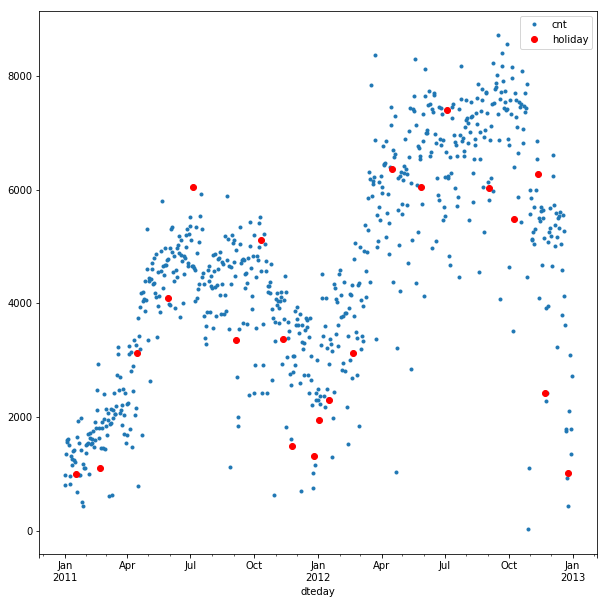

In [254]:
ax = df.plot(x="dteday", y="cnt", style=".", figsize=(10,10))
mask = df.holiday == 1
df[mask].plot(x="dteday", y="cnt", style="o",c="r", ax = ax, label="holiday")

plt.legend()
plt.show()

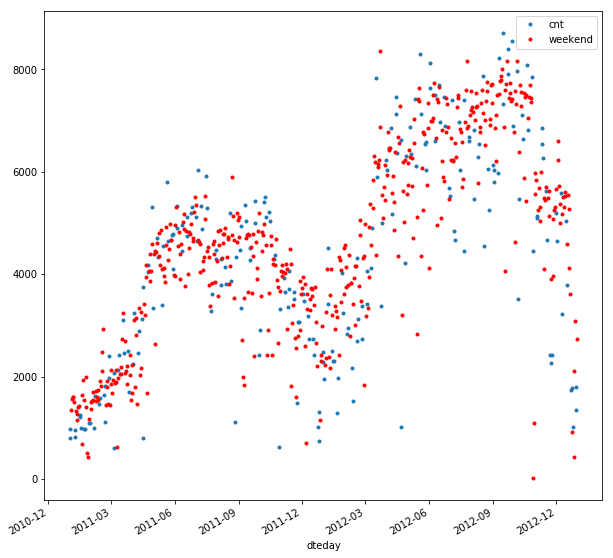

In [330]:
ax = df[df.workingday == 0].plot(x="dteday", y="cnt", style=".", figsize=(10,10))
df[df.workingday == 1].plot(x="dteday", y="cnt", style=".",c="r", ax = ax, label="weekend")

plt.legend()
plt.show()

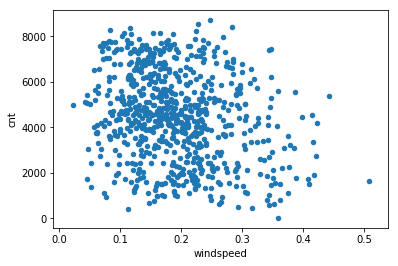

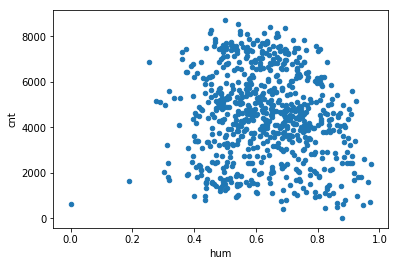

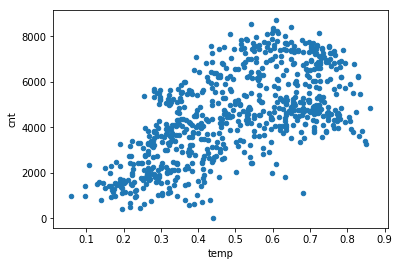

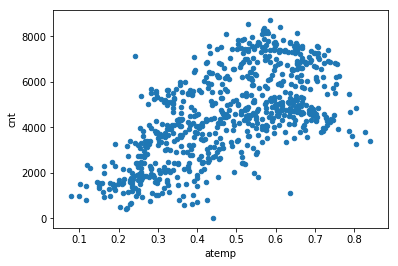

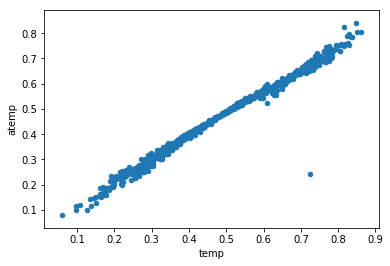

In [58]:
df.plot.scatter(x="windspeed", y="cnt")
df.plot.scatter(x="hum", y="cnt")
df.plot.scatter(x="temp", y="cnt")
df.plot.scatter(x="atemp", y="cnt")
df.plot.scatter(x="temp", y="atemp")


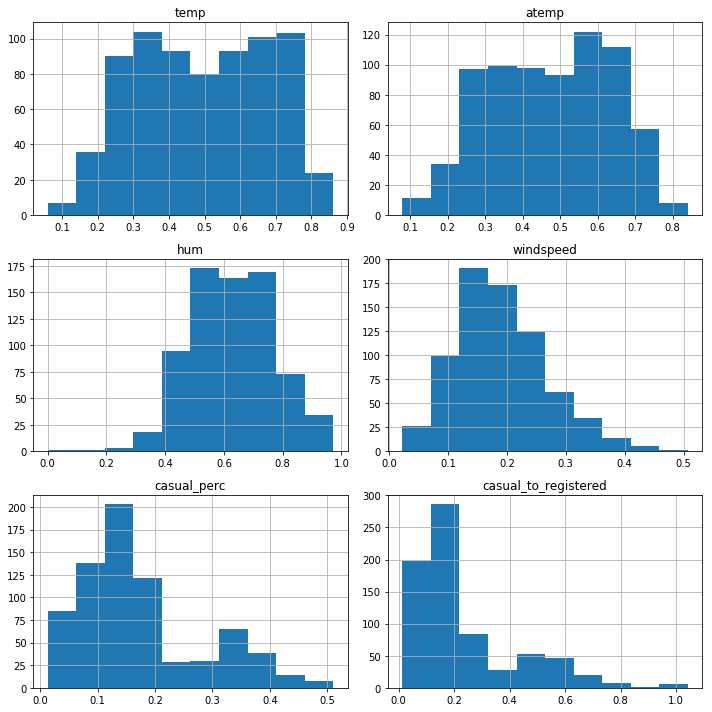

In [248]:
fig, ax = plt.subplots(3,2, figsize=(10,10))

df.hist(column="temp", ax=ax[0,0])
df.hist(column="atemp", ax=ax[0,1])
df.hist(column="hum", ax=ax[1,0])
df.hist(column="windspeed", ax=ax[1,1])
df.hist(column="casual_perc", ax=ax[2,0])
df.hist(column="casual_to_registered", ax=ax[2,1])

plt.tight_layout()

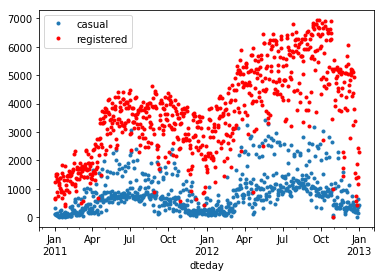

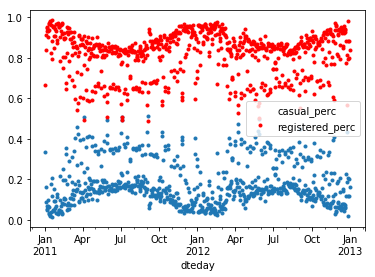

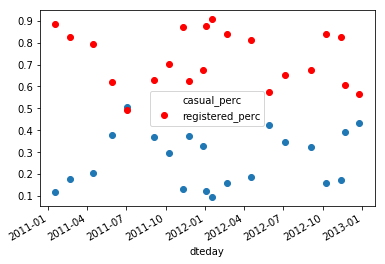

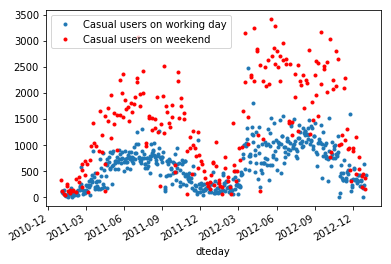

In [260]:
ax = df.plot(x="dteday", y="casual", style=".")
df.plot(x="dteday", y="registered", c="r", ax = ax, style=".")
plt.legend()

ax2 = df.plot(x="dteday", y="casual_perc", style=".")
df.plot(x="dteday", y="registered_perc", c="r", ax = ax2, style=".")


mask = df.holiday == 1
ax3 = df[mask].plot(x="dteday", y="casual_perc", style="o")
ax3 = df[mask].plot(x="dteday", y="registered_perc", style="o", c="r", ax=ax3)

ax4 = df[df.workingday == 1].plot(x="dteday", y="casual", style=".", label="Casual users on working day")
df[df.workingday == 0].plot(x="dteday", y="casual", style=".", c="r", ax=ax4, label="Casual users on weekend")

plt.legend()
plt.show()

- Ratio of casual to registered users changes through the year
    - lower in winter, higher in summer

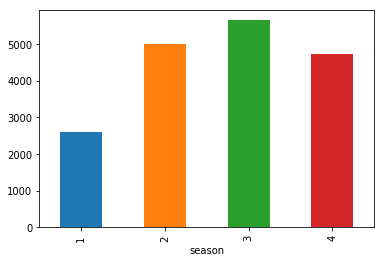

In [28]:
df.groupby("season").cnt.mean().plot.bar()



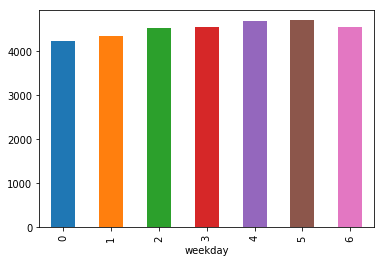

In [49]:
df.groupby("weekday").cnt.mean().plot.bar()


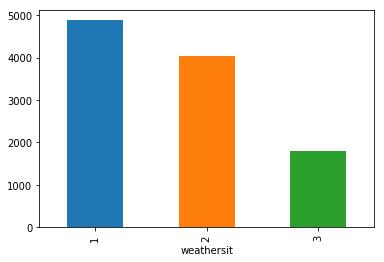

In [331]:
df.groupby("weathersit").cnt.mean().plot.bar()


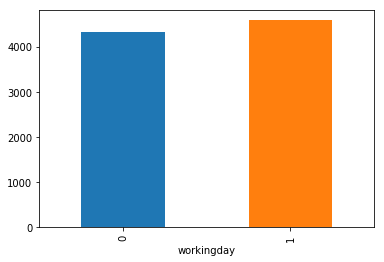

In [23]:
df.groupby("workingday").cnt.mean().plot.bar()


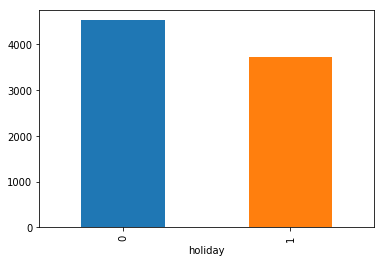

In [20]:
df.groupby("holiday").cnt.mean().plot.bar()


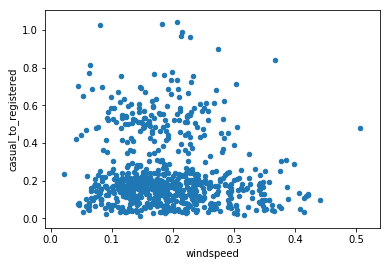

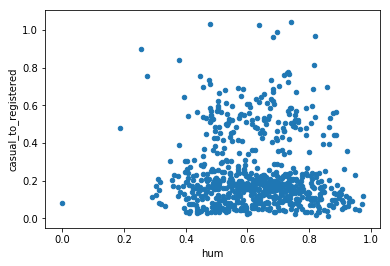

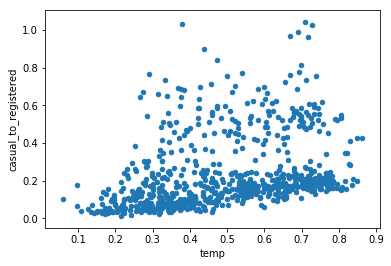

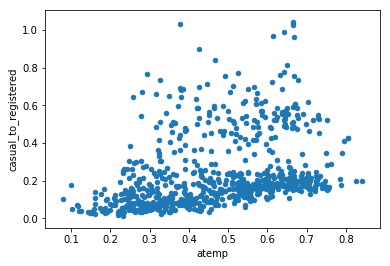

In [43]:
df.plot.scatter(x="windspeed", y="casual_to_registered")

df.plot.scatter(x="hum", y="casual_to_registered")

df.plot.scatter(x="temp", y="casual_to_registered")

df.plot.scatter(x="atemp", y="casual_to_registered")


Second cluster of behaviour.

What is causing this?

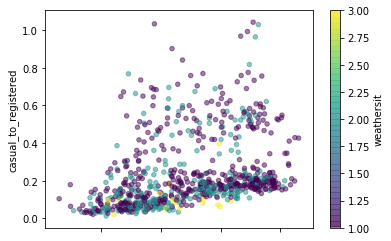

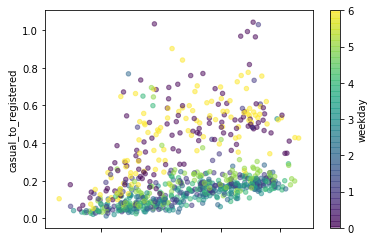

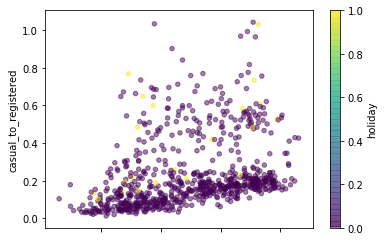

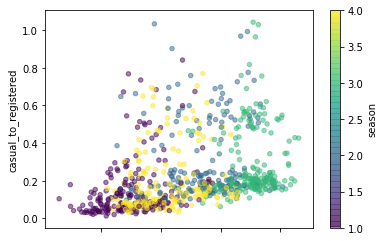

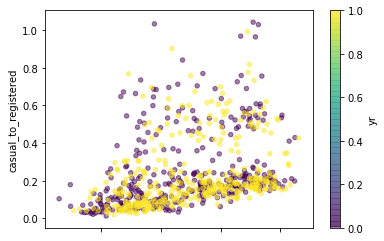

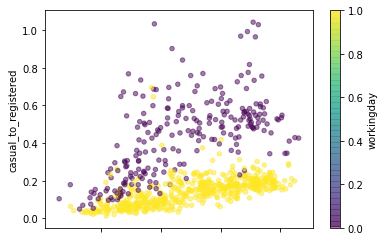

In [268]:

df.plot.scatter(x="temp", y="casual_to_registered", c="weathersit", colormap="viridis", alpha=0.5)
df.plot.scatter(x="temp", y="casual_to_registered", c="weekday", colormap="viridis", alpha=0.5)
df.plot.scatter(x="temp", y="casual_to_registered", c="holiday", colormap="viridis", alpha=0.5)
df.plot.scatter(x="temp", y="casual_to_registered", c="season", colormap="viridis", alpha=0.5)
df.plot.scatter(x="temp", y="casual_to_registered", c="yr", colormap="viridis", alpha=0.5)
df.plot.scatter(x="temp", y="casual_to_registered", c="workingday", colormap="viridis", alpha=0.5)




- Proportionally more casual to registered users on the weekend than on the working day

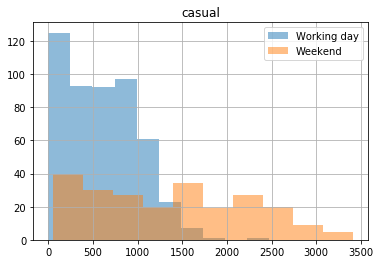

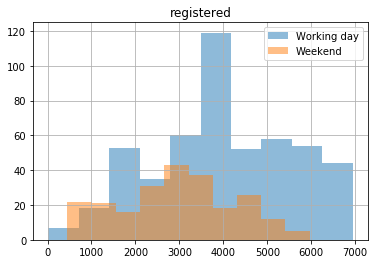

In [326]:
ax = df[df.workingday==1].hist(column="casual", alpha=0.5, label="Working day")
df[df.workingday==0].hist(column="casual", ax = ax, alpha=0.5, label="Weekend")
plt.legend()

ax = df[df.workingday==1].hist(column="registered", alpha=0.5, label="Working day")
df[df.workingday==0].hist(column="registered", ax = ax, alpha=0.5, label="Weekend")
plt.legend()

## Correlation with Target Variable

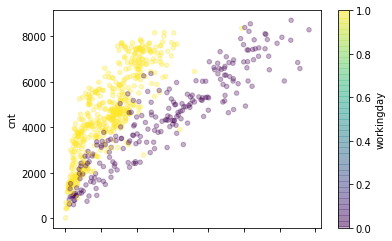

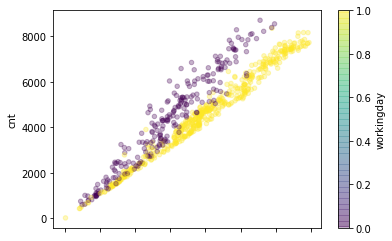

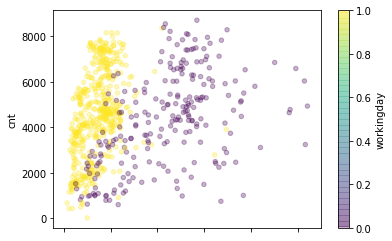

In [397]:
df.plot.scatter(x="casual", y="cnt", style=".", c="workingday", colormap="viridis", alpha=0.3)

df.plot.scatter(x="registered", y="cnt", style=".", c="workingday", colormap="viridis", alpha=0.3)

df.plot.scatter(x="casual_to_registered", y="cnt", style=".", c="workingday", colormap="viridis", alpha=0.3)


## Weather Features


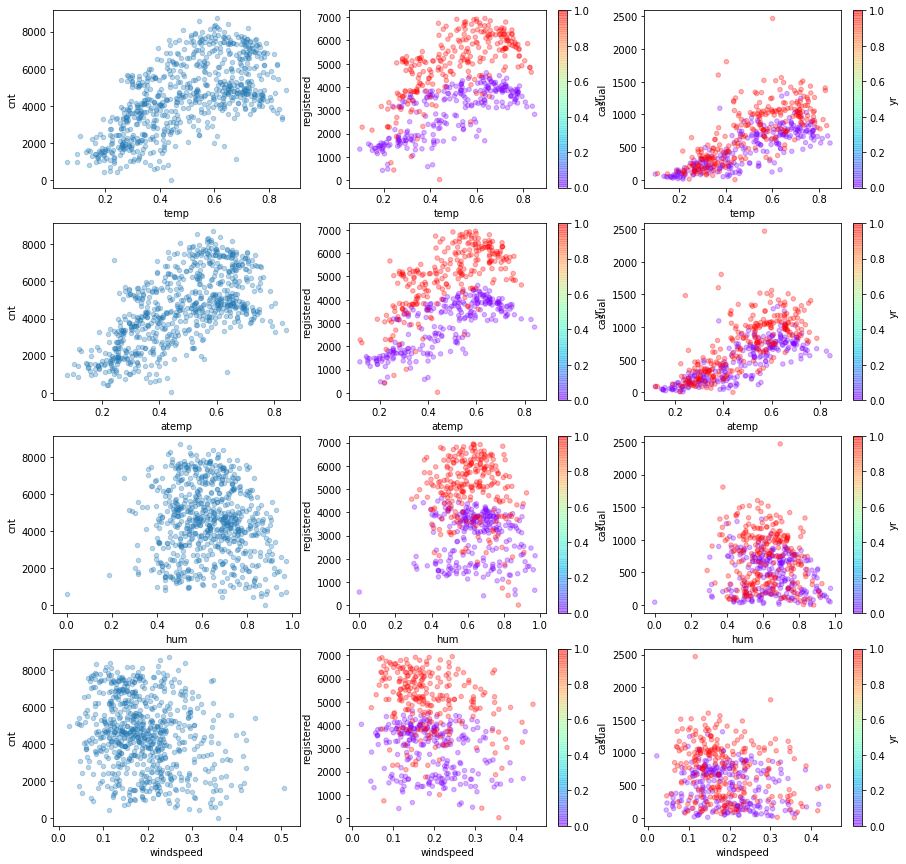

In [486]:
fig, ax = plt.subplots(4,3, figsize=(15,15))
df.plot.scatter(x="temp", y="cnt", style=".", alpha=0.3, ax = ax[0,0])
df.plot.scatter(x="atemp", y="cnt", style=".", alpha=0.3, ax = ax[1,0])
df.plot.scatter(x="hum", y="cnt", style=".", alpha=0.3, ax = ax[2,0])
df.plot.scatter(x="windspeed", y="cnt", style=".", alpha=0.3, ax = ax[3,0])

splitBy = "yr"
colmap = "rainbow"
y="registered"
df[df.workingday==1].plot.scatter(x="temp", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[0,1])
df[df.workingday==1].plot.scatter(x="atemp", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[1,1])
df[df.workingday==1].plot.scatter(x="hum", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[2,1])
df[df.workingday==1].plot.scatter(x="windspeed", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[3,1])


y="casual"
df[df.workingday==1].plot.scatter(x="temp", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[0,2])
df[df.workingday==1].plot.scatter(x="atemp", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[1,2])
df[df.workingday==1].plot.scatter(x="hum", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[2,2])
df[df.workingday==1].plot.scatter(x="windspeed", y=y, style=".", c=splitBy, colormap=colmap, alpha=0.3, ax = ax[3,2])



More registered users in the second year than in the first year -NO!!

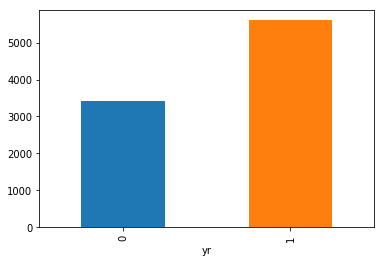

In [471]:
df.groupby("yr").cnt.mean().plot.bar()


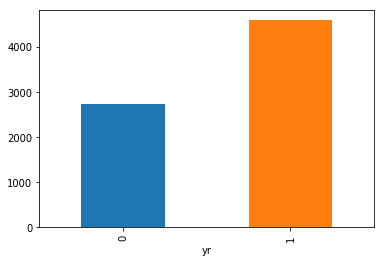

In [483]:
df.groupby("yr").registered.mean().plot.bar()


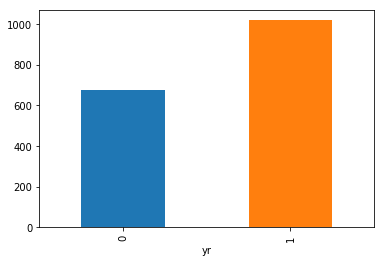

In [484]:
df.groupby("yr").casual.mean().plot.bar()


## Feature Selection

Use sklearn decision tree to understand feature importance

In [429]:
from sklearn.ensemble import ExtraTreesRegressor

mask = np.random.rand(len(df)) < 0.5

train_x = features[mask]
train_y = target[mask]

test_x = features[~mask]
test_y = target[~mask]

forest = ExtraTreesRegressor(n_estimators=len(features.columns), bootstrap=True)
forest.fit(np.array(train_x), train_y)
importances = forest.feature_importances_

In [430]:

indices = np.argsort(importances)[::-1]

features.columns[indices]

Index(['registered', 'yr', 'casual', 'temp', 'season', 'mnth',
       'registered_perc', 'casual_to_registered', 'casual_perc', 'windspeed',
       'workingday', 'hum', 'weathersit', 'holiday'],
      dtype='object')

In [431]:
np.sort(importances)[::-1]

array([0.42632358, 0.18878336, 0.16853548, 0.09848765, 0.0707196 ,
       0.00864732, 0.0085138 , 0.00781067, 0.0076788 , 0.00577122,
       0.00329094, 0.00274977, 0.00185519, 0.00083261])

In [432]:
select = 1

res = forest.predict(np.array(test_x.iloc[select:select+1]))
print("Predicted", res)
print("Actual", np.array(test_y.iloc[select:select+1]))

Predicted [0.15166071]
Actual [0.15480835]


In [433]:
print("Train R^2 :", forest.score(train_x, train_y))
print("Test R^2 :", forest.score(test_x, test_y))

Train R^2 : 0.9963032257897563
Test R^2 : 0.9867962847916575


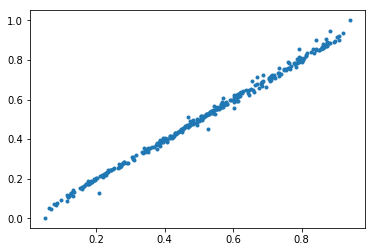

In [434]:
res = forest.predict(np.array(train_x))
act = np.array(train_y)
plt.plot(res,act, '.')

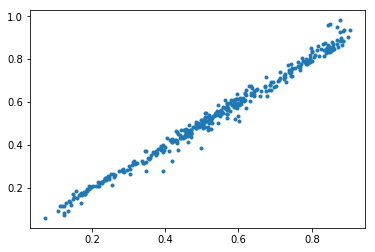

In [435]:
res = forest.predict(np.array(test_x))
act = np.array(test_y)
plt.plot(res,act, '.')

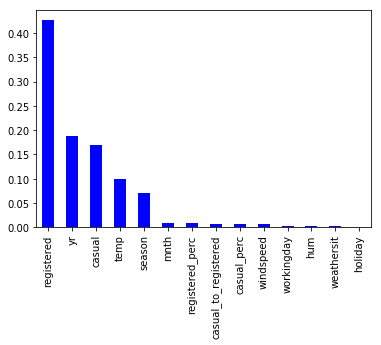

In [436]:
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.sort_values(ascending=False).plot.bar(color="b", ) 

Train R^2 : 0.9782123586799423
Test R^2 : 0.9294632858389574


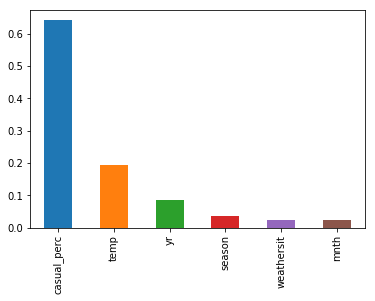

In [454]:
new_features = features[["yr", "temp", "season", "mnth", "weathersit", "casual_perc"]]
np.random.seed(2)
mask = np.random.rand(len(df)) < 0.5

train_x = new_features[mask]
train_y = target[mask]

test_x = new_features[~mask]
test_y = target[~mask]

forest = ExtraTreesRegressor(n_estimators=len(new_features.columns), bootstrap=True)
forest.fit(np.array(train_x), train_y)
print("Train R^2 :", forest.score(train_x, train_y))
print("Test R^2 :", forest.score(test_x, test_y))


In [440]:
new_features = features[["yr", "temp", "season"]]
np.random.seed(2)
mask = np.random.rand(len(df)) < 0.5

train_x = new_features[mask]
train_y = target[mask]

test_x = new_features[~mask]
test_y = target[~mask]

forest = ExtraTreesRegressor(n_estimators=len(new_features.columns), bootstrap=True)
forest.fit(np.array(train_x), train_y)
print("Train R^2 :", forest.score(train_x, train_y))
print("Test R^2 :", forest.score(test_x, test_y))

Train R^2 : 0.933879085959525
Test R^2 : 0.7567669911646062


## What am I predicting?

Possible target variables:
    - total users
    - registered users
    - casual users

In [487]:
new_features = features.drop(["casual", "registered", "casual_perc", "casual_to_registered", "registered_perc"], axis=1)
target_registered = features.registered
target_casual = features.casual
target = target_registered

np.random.seed(2)
mask = np.random.rand(len(df)) < 0.5

train_x = new_features[mask]
train_y = target[mask]

test_x = new_features[~mask]
test_y = target[~mask]

forest = ExtraTreesRegressor(n_estimators=len(new_features.columns), bootstrap=True)
forest.fit(np.array(train_x), train_y)
print("Predicting Registered User Usage")
print("Train R^2 :", forest.score(train_x, train_y))
print("Test R^2 :", forest.score(test_x, test_y))

feat_importances_registered = pd.Series(forest.feature_importances_, index=new_features.columns)


Predicting Registered User Usage
Train R^2 : 0.9697636444457486
Test R^2 : 0.8683361340542501


Predicting Casual User Usage
Train R^2 : 0.951028094926923
Test R^2 : 0.8312840324249035


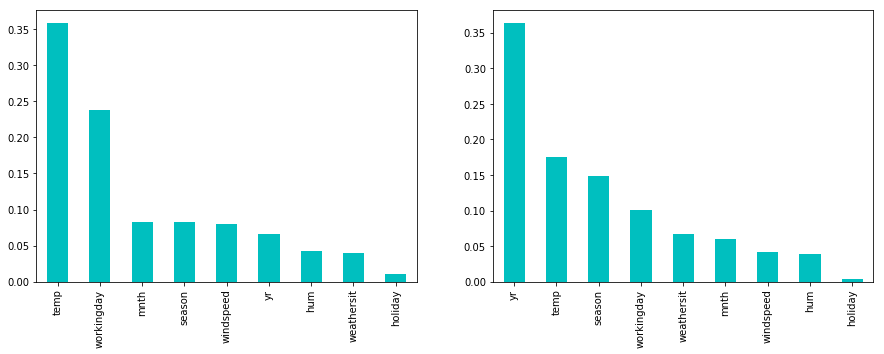

In [488]:
new_features = features.drop(["casual", "registered", "casual_perc", "casual_to_registered", "registered_perc"], axis=1)
target_registered = features.registered
target_casual = features.casual
target = target_casual

np.random.seed(2)
mask = np.random.rand(len(df)) < 0.5

train_x = new_features[mask]
train_y = target[mask]

test_x = new_features[~mask]
test_y = target[~mask]

forest = ExtraTreesRegressor(n_estimators=len(new_features.columns), bootstrap=True)
forest.fit(np.array(train_x), train_y)
print("Predicting Casual User Usage")
print("Train R^2 :", forest.score(train_x, train_y))
print("Test R^2 :", forest.score(test_x, test_y))


feat_importances_casual = pd.Series(forest.feature_importances_, index=new_features.columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))
feat_importances_casual.sort_values(ascending=False).plot.bar(color="c", ax=ax[0])
feat_importances_registered.sort_values(ascending=False).plot.bar(color="c", ax=ax[1]) 